In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
import sqlite3

DB_NAME = "sense.db"
connection = sqlite3.connect(DB_NAME, detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)

In [3]:
cursor = connection.cursor()

values = {
    "time": [],
    "humidity": [],
    "pressure": [],
    "temperature_humidity": [],
    "temperature_pressure": [],
    "cpu_temperature": [],
}

cursor.execute("""
    SELECT time as "[timestamp]", humidity, pressure, temperature_humidity, temperature_pressure, cpu_temperature
    FROM measurements
""")
for row in cursor.fetchall():
    values["time"].append(row[0])
    values["humidity"].append(row[1])
    values["pressure"].append(row[2])
    values["temperature_humidity"].append(row[3])
    values["temperature_pressure"].append(row[4])
    values["cpu_temperature"].append(row[5])

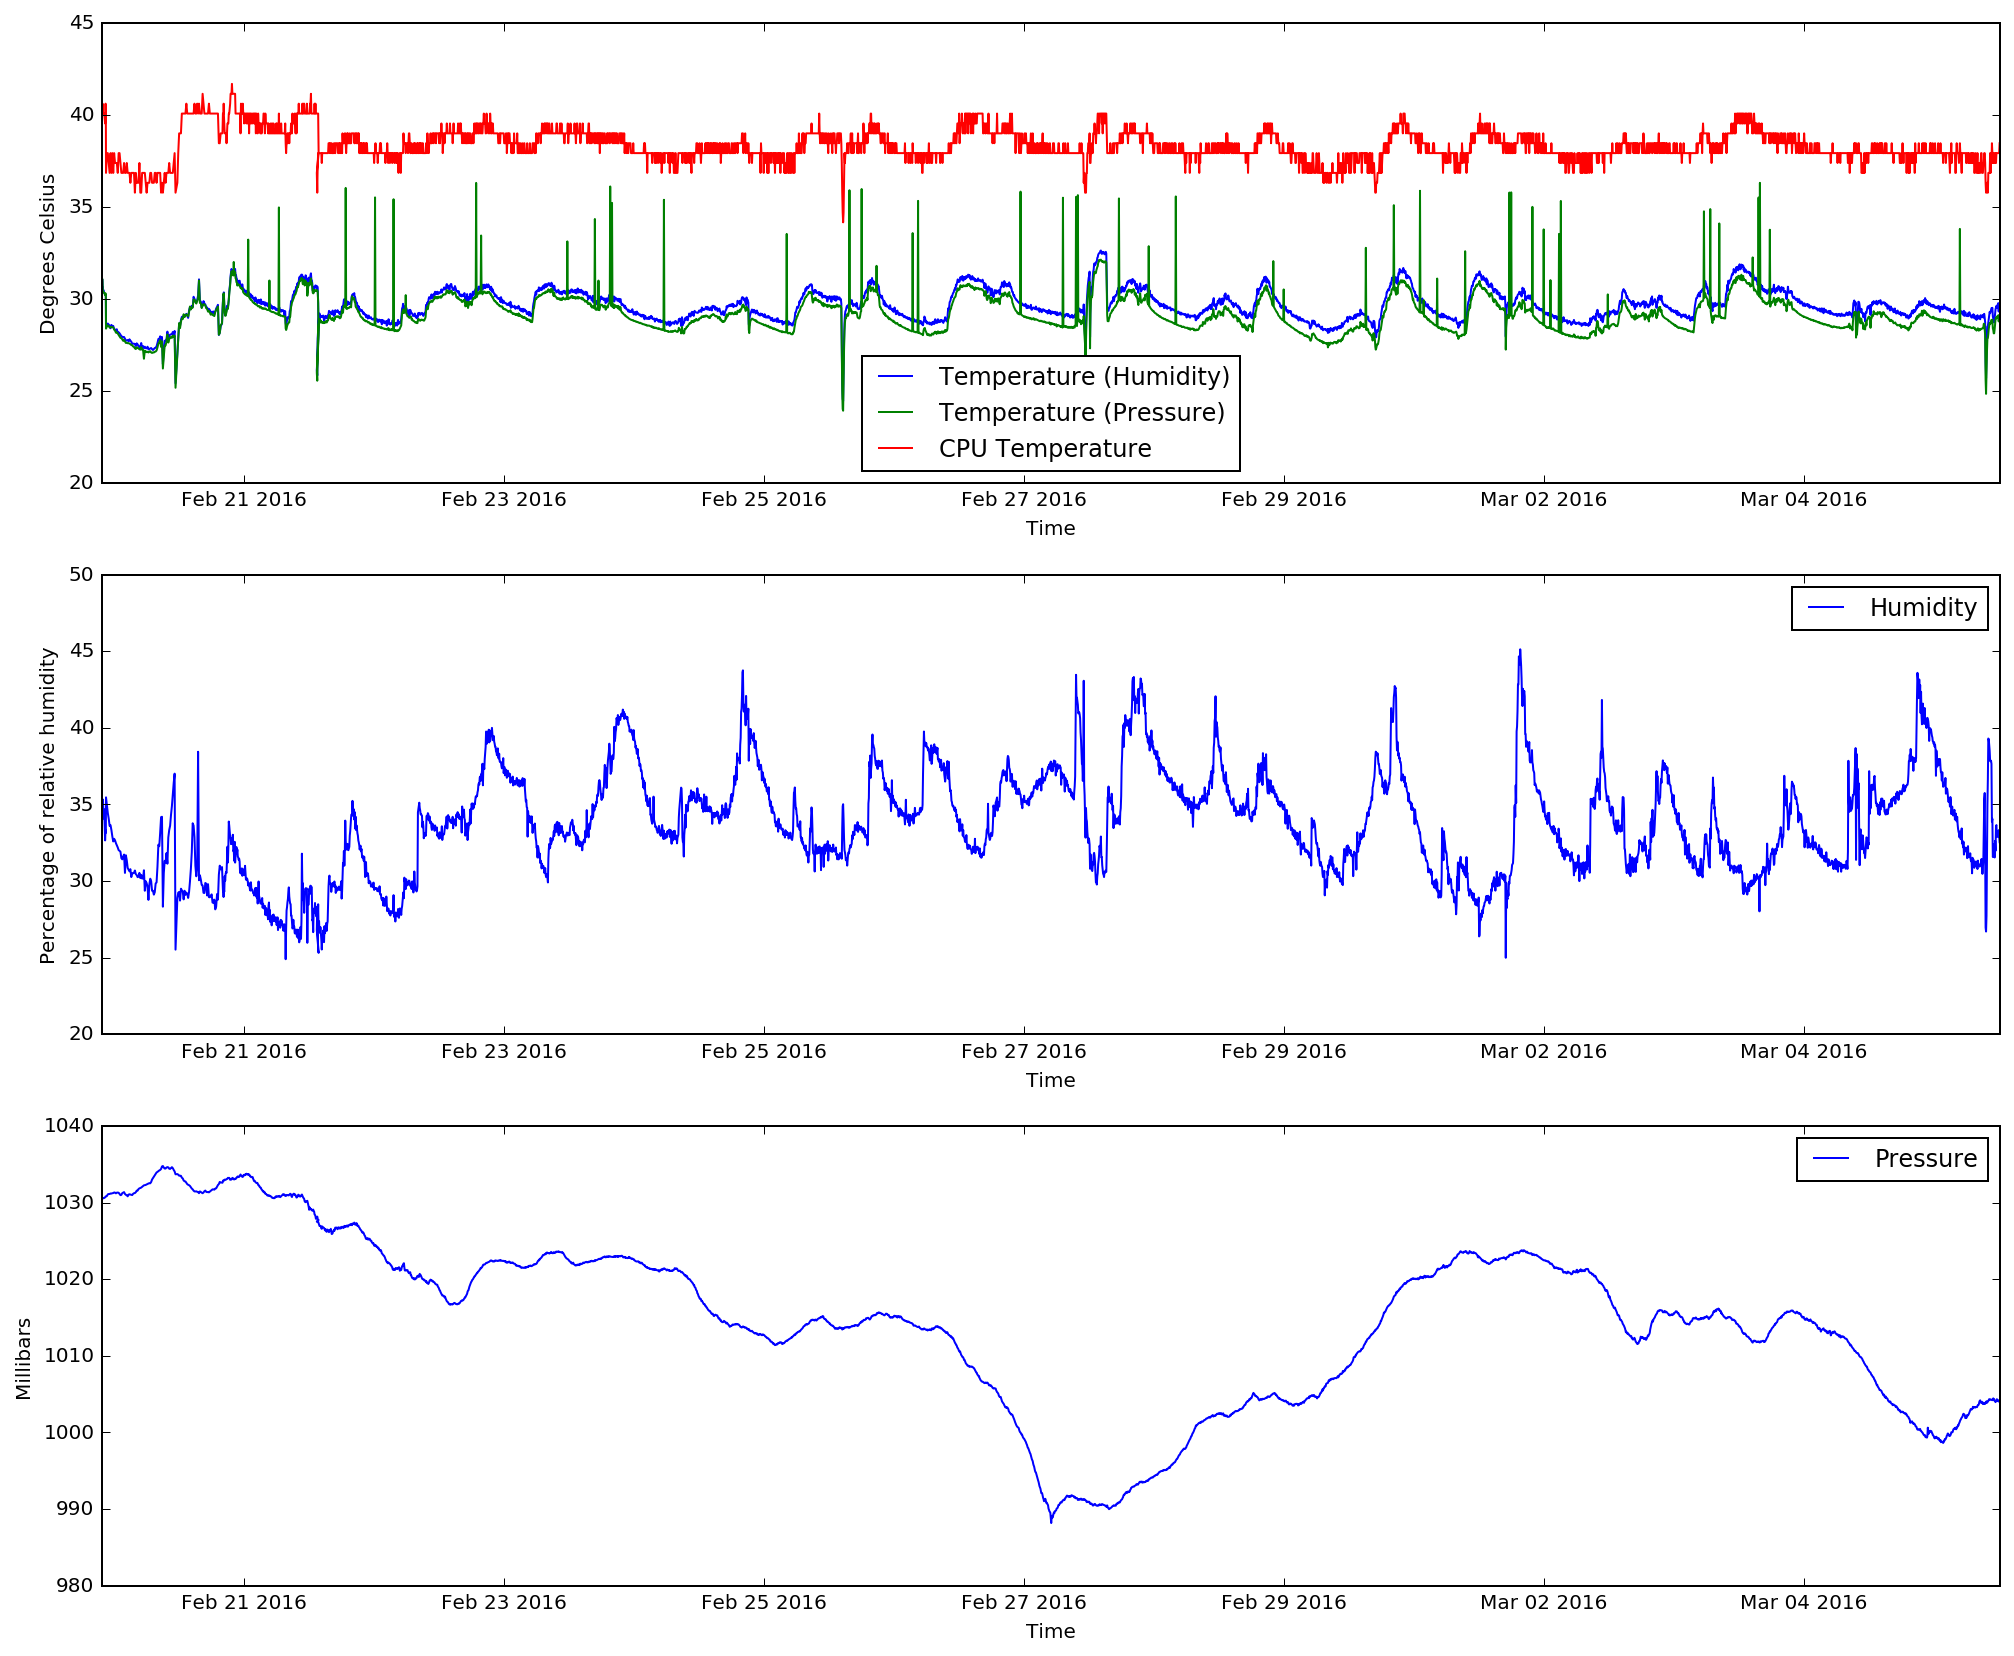

In [4]:
plt.figure(figsize=(17, 14))

plt.subplot(3, 1, 1)
plt.plot(values["time"], values["temperature_humidity"], label="Temperature (Humidity)")
plt.plot(values["time"], values["temperature_pressure"], label="Temperature (Pressure)")
plt.plot(values["time"], values["cpu_temperature"], label="CPU Temperature")
plt.xlabel("Time")
plt.ylabel("Degrees Celsius")
plt.legend(loc="best")

plt.subplot(3, 1, 2)
plt.plot(values["time"], values["humidity"], label="Humidity")
plt.xlabel("Time")
plt.ylabel("Percentage of relative humidity")
plt.legend(loc="best")

plt.subplot(3, 1, 3)
plt.plot(values["time"], values["pressure"], label="Pressure")
plt.xlabel("Time")
plt.ylabel("Millibars")
plt.legend(loc="best")

plt.show()

In [5]:
connection.close()